In [34]:
!pip install pyiwn
!pip install googletrans==4.0.0-rc1
!pip install datasets


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/55.1 kB ? eta -:--:--
     ----------------------                   30.7/55.1 kB ? eta -:--:--
     -------------------------------------- 55.1/55.1 kB 954.5 kB/s eta 0:00:00
                                              0.0/1.1 MB ? eta -:--:--
     ---                                      0.1/1.1 MB 5.1 MB/s eta 0:00:01
     --------                                 0.2/1.1 MB 2.7 MB/s eta 0:00:01
     ------------                             0.3/1.1 MB 2.6 MB/s eta 0:00:01
     -----------------                        0.5/1.1 MB 2.9 MB/s eta 0:00:01
     -----------------------------------      1.0/1.1 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.5 MB/s eta 0:00:00
                                              0.0/133.4 kB ? eta -:--:--
     -------------------------------------- 133.4/133.4 kB 7.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.8.0 requires httpx<1,>=0.23.0, but you have httpx 0.13.3 which is incompatible.
roboflow 1.1.14 requires chardet==4.0.0, but you have chardet 3.0.4 which is incompatible.
youtube-search-python 1.6.6 requires httpx>=0.14.2, but you have httpx 0.13.3 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pyiwn
pyiwn.download()
iwn = pyiwn.IndoWordNet()

2024-03-20:19:36:28,627 INFO     [iwn.py:43] Loading hindi language synsets...


In [18]:
!pip install pyiwn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']

In [19]:
for i in range(len(df)):
    df['3'] = df['3'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])
    df['4'] = df['4'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

df.tail(10)

ImportError: cannot import name 'Pyiwn' from 'pyiwn' (c:\g\pproject\aimbot\bot\bot\lib\site-packages\pyiwn\__init__.py)

In [4]:
synset=synsets[0]
synset.pos()
synset.lemmas()
synset.gloss()  
synset.examples()

['समय किसी का इंतजार नहीं करता ।',
 'आप किस ज़माने की बात कर रहे हैं ।',
 'वक़्त कैसे बीतता है, कुछ पता ही नहीं चलता ।',
 'वह कुछ देर के लिए यहाँ भी आया था ।']

In [10]:
lemma = synset.lemmas()[0]

In [13]:
synsets=iwn.synsets('समय', pos='noun')[0]

In [16]:
synonyms = iwn.synonyms('गर्मी')
print(synonyms)


AttributeError: 'IndoWordNet' object has no attribute 'synonyms'

In [5]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')  

distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

input_ids = tf.keras.Input(shape=(max_seq_length,), dtype=tf.int32)
attention_mask = tf.keras.Input(shape=(max_seq_length,), dtype=tf.int32)
output = distilbert_model([input_ids, attention_mask])[0]
output = tf.keras.layers.GlobalAveragePooling1D()(output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs, batch_size=batch_size)

loss, accuracy = model.evaluate(test_dataset)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

KeyboardInterrupt: 

In [6]:
from nltk.corpus import wordnet

def augment_dataset(sentence, num_augmented_samples=5):
    augmented_samples = []
    synonyms = []
    for word in sentence.split():
        synonyms.extend([lemma.name() for synset in synsets for lemma in synset.lemmas()])
    synonyms = list(set(synonyms))  # Remove duplicates
    for synonym in synonyms[:num_augmented_samples]:
        augmented_samples.append(sentence.replace(word, synonym))
    return augmented_samples

original_sentence = "आज मौसम बहुत अच्छा है।"
augmented_sentences = augment_dataset(original_sentence)
print("Original Sentence:", original_sentence)
print("Augmented Sentences:", augmented_sentences) 

Original Sentence: आज मौसम बहुत अच्छा है।
Augmented Sentences: ['आज मौसम बहुत अच्छा समा', 'आज मौसम बहुत अच्छा चांस', 'आज मौसम बहुत अच्छा दौर', 'आज मौसम बहुत अच्छा औसर', 'आज मौसम बहुत अच्छा टाइम']


#this is for semantic similarity

first  Interval- Valued Fuzzy Hindi WordNet graph

intrigrating this as a layer to my distilled bert

training with the translated data


next to find the redundant sentences using the ssimilarity score and find removing them.

then v summrize the paragraph

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

AssertionError: CUDA is not available. Please check your GPU settings.

In [ ]:
device

device(type='cpu')

PREPROCESSING

In [1]:
from datasets import load_dataset
dataset = load_dataset("stsb_multi_mt", name="en", split="train")


c:\g\pproject\aimbot\bot\bot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

Dataset({
    features: ['sentence1', 'sentence2', 'similarity_score'],
    num_rows: 5749
})

In [2]:
import pandas as pd
df = dataset.to_pandas()

<Axes: >

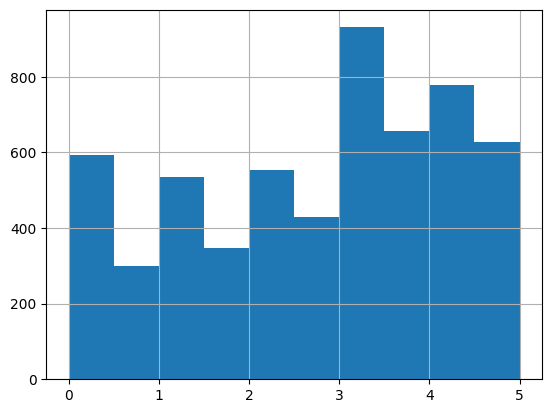

In [3]:
df.head()
df.similarity_score.hist()


In [4]:
df.shape

(5749, 3)

In [6]:
!pip install googletrans==4.0.0-rc1


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from googletrans import Translator

def translate_to_hindi(text):
    translator = Translator()
    translated_text = translator.translate(text, src='en', dest='hi')
    return translated_text.text

def translate_to_english(text):
    translator = Translator()
    translated_text = translator.translate(text, src='hi', dest='en')
    return translated_text.text

# English text to be translated
english_text = "It is very cold tonight."
h2="आज शाम को ठंड बहुत ज्यादा है।"
# Translate English text to Hindi
hindi_text = translate_to_hindi(english_text)
e2=translate_to_english(h2)
print("English:", english_text)
print("Hindi:", hindi_text)


print("Hindi:", h2)
print("English:", e2)

English: It is very cold tonight.
Hindi: आज रात बहुत ठंडा है।
Hindi: आज शाम को ठंड बहुत ज्यादा है।
English: This evening is very much cold.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'similarity_score' column and transform it
df['similarity_score_1'] = scaler.fit_transform(df[['similarity_score']])

In [ ]:
df.head()

,sentence1,sentence2,similarity_score,similarity_score_1
0,A plane is taking off.,An air plane is taking off.,5.00,1.00
1,A man is playing a large flute.,A man is playing a flute.,3.80,0.76
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,0.76
3,Three men are playing chess.,Two men are playing chess.,2.60,0.52
4,A man is playing the cello.,A man seated is playing the cello.,4.25,0.85


In [8]:
def translate_to_hindi_batch(texts, model_name='Helsinki-NLP/opus-mt-en-hi'):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    tokenized_texts = tokenizer.prepare_seq2seq_batch(texts, return_tensors='pt')
    translated = model.generate(**tokenized_texts)
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    return translated_texts

In [11]:
# df['s1']=df['sentence1'].apply(translate_to_hindi)
hindi_text = translate_to_hindi_batch(english_text)
print("English:", english_text)
print("Hindi:", hindi_text)


NameError: name 'MarianTokenizer' is not defined

In [ ]:
from multiprocessing import Pool
import numpy as np
def parallelize_dataframe(df, func, n_cores=16):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def apply_translate_to_hindi(df):
    df['s1'] = df['sentence1'].apply(translate_to_hindi)
    return df

# df = parallelize_dataframe(df, apply_translate_to_hindi)

In [ ]:
from multiprocessing import Pool
import numpy as np

In [ ]:
# Get the first 10 rows of the DataFrame
df_first_10 = df.iloc[:10]
df_first_10['s1']=df_first_10['sentence1'].apply(translate_to_hindi)
# Apply the parallelized translation to the first 10 rows


C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_29020\3480285127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_10['s1']=df_first_10['sentence1'].apply(translate_to_hindi)


In [ ]:
df.head()

,sentence1,sentence2,similarity_score,similarity_score_1
0,A plane is taking off.,An air plane is taking off.,5.00,1.00
1,A man is playing a large flute.,A man is playing a flute.,3.80,0.76
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,0.76
3,Three men are playing chess.,Two men are playing chess.,2.60,0.52
4,A man is playing the cello.,A man seated is playing the cello.,4.25,0.85


In [ ]:
df_first_10.head(10)
df_first_10['s2']=df_first_10['sentence2'].apply(translate_to_hindi)

AttributeError: 'Translator' object has no attribute 'raise_Exception'

In [97]:
import threading

# This will hold the results
results = [None] * 100  # Adjusted to match the number of threads

# Define a function to be executed in each thread
def thread_function(thread_id, rangge):
    df_first_10 = df.iloc[rangge:rangge+1]  # Adjusted to translate one line per thread
    df_first_10['s1'] = df_first_10['sentence1'].apply(translate_to_hindi)
    # Save the result to the shared list
    results[thread_id - 1] = df_first_10

# Create and start 100 threads
threads = []
for i in range(1, 101):
    thread = threading.Thread(target=thread_function, args=(i, i-1))  # Adjusted to correctly slice the DataFrame
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Now, 'results' contains the results from each thread
print("All threads have finished execution.")
result_df = pd.concat(results)

Exception in thread Thread-2100:
Traceback (most recent call last):
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-2098:
Traceback (most recent call last):
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-2095:
Traceback (most recent call last):
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 910, in run
    self.run()
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 910, in run
    self.run()
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_29020\3949223947.py", line 10, in thread_function
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_29020\394922

ValueError: All objects passed were None

In [11]:
import numpy as np

# Ensure the DataFrame has 5000 rows
df_trimmed = df.iloc[:5000]

# Convert the DataFrame to a numpy array
arr = np.array(df_trimmed)

# Split the array into 100 sub-arrays
arrs = np.array_split(arr, 100)

print(arrs)

[array([['A plane is taking off.', 'An air plane is taking off.', 5.0],
       ['A man is playing a large flute.', 'A man is playing a flute.',
        3.799999952316284],
       ['A man is spreading shreded cheese on a pizza.',
        'A man is spreading shredded cheese on an uncooked pizza.',
        3.799999952316284],
       ['Three men are playing chess.', 'Two men are playing chess.',
        2.5999999046325684],
       ['A man is playing the cello.',
        'A man seated is playing the cello.', 4.25],
       ['Some men are fighting.', 'Two men are fighting.', 4.25],
       ['A man is smoking.', 'A man is skating.', 0.5],
       ['The man is playing the piano.',
        'The man is playing the guitar.', 1.600000023841858],
       ['A man is playing on a guitar and singing.',
        'A woman is playing an acoustic guitar and singing.',
        2.200000047683716],
       ['A person is throwing a cat on to the ceiling.',
        'A person throws a cat on the ceiling.', 5.0],
    

In [36]:
import pandas as pd

# Convert the numpy array back to a DataFrame
df0 = pd.DataFrame(arrs[0])

df0[3]=df0[0]
df0

,0,1,2,3
0,A plane is taking off.,An air plane is taking off.,5.0,A plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.,3.8,A man is playing a large flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.8,A man is spreading shreded cheese on a pizza.
3,Three men are playing chess.,Two men are playing chess.,2.6,Three men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.,4.25,A man is playing the cello.
5,Some men are fighting.,Two men are fighting.,4.25,Some men are fighting.
6,A man is smoking.,A man is skating.,0.5,A man is smoking.
7,The man is playing the piano.,The man is playing the guitar.,1.6,The man is playing the piano.
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.2,A man is playing on a guitar and singing.
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.0,A person is throwing a cat on to the ceiling.


In [39]:
import threading

results = [None] * 100

def thread_function(thread_id):
    print('thread id', thread_id)
    df_first_10 =  pd.DataFrame(arrs[thread_id])
    df_first_10[3] = df_first_10[0].apply(translate_to_hindi)
    results[thread_id] = df_first_10

threads = []
for i in range(0, 100):
    thread = threading.Thread(target=thread_function, args=(i,))  
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

print("All threads have finished execution.")
# result_df = pd.concat(results)

thread id 0
thread id 1
thread id 2
thread id 3
thread id 4
thread id 5
thread id 6
thread id 7
thread id 8
thread id 9
thread id 10
thread id 11
thread id 12
thread id 13
thread id 14
thread id 15
thread id 16
thread id 17
thread id 18
thread id 19
thread id 20
thread id 21
thread id 22
thread id 23
thread id 24
thread id 25
thread id 26
thread id 27
thread id 28
thread id 29
thread id 30
thread id 31
thread id 32
thread id 33
thread id 34
thread id 35
thread id 36
thread id 37
thread id 38
thread id 39
thread id 40
thread id 41
thread id 42
thread id 43
thread id 44
thread id 45
thread id 46
thread id 47
thread id 48
thread id 49
thread id 50
thread id 51
thread id 52
thread id 53
thread id 54
thread id 55
thread id 56
thread id 57
thread id 58
thread id 59
thread id 60
thread id 61
thread id 62
thread id 63
thread id 64
thread id 65
thread id 66
thread id 67
thread id 68
thread id 69
thread id 70
thread id 71
thread id 72
thread id 73
thread id 74
thread id 75
thread id 76
thread id

Exception in thread Thread-445:
Traceback (most recent call last):
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Gaurav B V\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_25848\3393418244.py", line 8, in thread_function
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pandas\core\series.py", line 4753, in apply
    return SeriesApply(
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pandas\core\apply.py", line 1207, in apply
    return self.apply_standard()
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pandas\core\apply.py", line 1287, in apply_standard
    mapped = obj._map_values(
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pandas\core\base.py", line 921, in _map_values
    return algorithms.map_array(arr, mapper, na_action=na_action, convert=convert)
  File "c:\g\pproject\aimbot\

All threads have finished execution.


In [ ]:
arr[]

In [40]:
for(i in arrs):


SyntaxError: invalid syntax (190382883.py, line 1)

: 

In [38]:
results[0]

,0,1,2,3
0,A plane is taking off.,An air plane is taking off.,5.0,एक विमान उतार रहा है।
1,A man is playing a large flute.,A man is playing a flute.,3.8,एक आदमी एक बड़ी बांसुरी बजा रहा है।
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.8,एक आदमी पिज्जा पर कटा हुआ पनीर फैला रहा है।
3,Three men are playing chess.,Two men are playing chess.,2.6,तीन आदमी शतरंज खेल रहे हैं।
4,A man is playing the cello.,A man seated is playing the cello.,4.25,एक आदमी सेलो खेल रहा है।
5,Some men are fighting.,Two men are fighting.,4.25,कुछ आदमी लड़ रहे हैं।
6,A man is smoking.,A man is skating.,0.5,एक आदमी धूम्रपान कर रहा है।
7,The man is playing the piano.,The man is playing the guitar.,1.6,आदमी पियानो बज रहा है।
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.2,एक आदमी एक गिटार पर खेल रहा है और गा रहा है।
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.0,एक व्यक्ति एक बिल्ली को छत पर फेंक रहा है।


In [31]:
df['sentence1']

0                                  A plane is taking off.
1                         A man is playing a large flute.
2           A man is spreading shreded cheese on a pizza.
3                            Three men are playing chess.
4                             A man is playing the cello.
                              ...                        
5744           Severe Gales As Storm Clodagh Hits Britain
5745    Dozens of Egyptians hostages taken by Libyan t...
5746                         President heading to Bahrain
5747           China, India vow to further bilateral ties
5748     Putin spokesman: Doping charges appear unfounded
Name: sentence1, Length: 5749, dtype: object

In [32]:
len(arrs)
arrs[99]['sentence1']   

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [20]:
!pip install inltk

                                              0.0/110.1 kB ? eta -:--:--
                                              0.0/110.1 kB ? eta -:--:--
                                              0.0/110.1 kB ? eta -:--:--
                                              0.0/110.1 kB ? eta -:--:--
     ---                                      10.2/110.1 kB ? eta -:--:--
     ---                                      10.2/110.1 kB ? eta -:--:--
     ---                                      10.2/110.1 kB ? eta -:--:--
     ---                                      10.2/110.1 kB ? eta -:--:--
     ---                                      10.2/110.1 kB ? eta -:--:--
     ----------                            30.7/110.1 kB 100.9 kB/s eta 0:00:01
     ----------                            30.7/110.1 kB 100.9 kB/s eta 0:00:01
     ----------                            30.7/110.1 kB 100.9 kB/s eta 0:00:01
     ----------                            30.7/110.1 kB 100.9 kB/s eta 0:00:01
     ----------   


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from inltk.inltk import setup
setup('hi') 
from inltk.inltk import get_embedding_vectors
word = "नृत्य"
vectors = get_embedding_vectors(word, 'hi')
print("Embedding Shape is {}".format(vectors.shape))

from inltk.inltk import get_sentence_encoding
text ="मैं भाग रहा हूँ"
encoding = get_sentence_encoding(text, 'hi')
print("Sentence Embedding Shape is {}".format(encoding.shape))

RuntimeError: This event loop is already running

We'll only do this for the first time.
We'll only do this for the first time.


In [23]:
!pip install inltk
!pip install torch==1.3.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
\


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.3.1+cpu (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch==1.3.1+cpu

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Done!


In [44]:
from inltk.inltk import setup 
setup('bn')

RuntimeError: This event loop is already running

We'll only do this for the first time.


In [45]:

from inltk.inltk import tokenize
 
text = 'गीक्स फॉर गीक्स एक बेहतरीन टेक्नोलॉजी लर्निंग \
प्लेटफॉर्म है।'
tokenize(text ,'hi')

['▁गी',
 'क्स',
 '▁फॉर',
 '▁गी',
 'क्स',
 '▁एक',
 '▁बेहतरीन',
 '▁टेक्नोलॉजी',
 '▁ल',
 'र्न',
 'िंग',
 '▁प्लेटफॉर्म',
 '▁है',
 '।']

We'll only do this for the first time.
Done!


In [29]:
from inltk.inltk import tokenize
text = "एक आदमी एक आलू काट रहा है।"
tokenize(text ,'hi')

['▁एक', '▁आदमी', '▁एक', '▁आलू', '▁काट', '▁रहा', '▁है', '।']

In [40]:
from inltk.inltk import get_embedding_vectors


vectors = get_embedding_vectors(text, 'hi')
# vectors[0].shape
# get_embedding_vectors(text,'pa')
# vectors = get_embedding_vectors(text,'pa')
# len(vectors)s

AttributeError: 'LSTM' object has no attribute '_flat_weights'

In [39]:
!pip install --upgrade inltk


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from inltk.inltk import get_embedding_vectors
from warnings import filterwarnings
from IPython.display import display
filterwarnings("ignore")

text = 'गीक्स फॉर गीक्स एक बेहतरीन टेक्नोलॉजी लर्निंग प्लेटफॉर्म है।'
vectors = get_embedding_vectors(text, 'hi')
# display(vectors)


AttributeError: 'LSTM' object has no attribute '_flat_weights'

In [50]:

from inltk.inltk import predict_next_words
 
text = 'गीक्स फॉर गीक्स एक बेहतरीन टेक्नोलॉजी'
n=3
predict_next_words(text , n, 'hi') 

AttributeError: 'LSTM' object has no attribute '_flat_weights'

In [52]:
!pip install --upgrade torch

                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                              0.0/198.5 MB ? eta -:--:--
                                            0.0/198.5 MB 100.9 kB/s eta 0:32:48
                                            0.0/198.5 MB 100.9 kB/s eta 0:32:48
                                            0.0/198.5 MB 100.9 kB/s eta 0:32:48
                                            0.0/198.5 MB 100.9 kB/s eta 0:32:48
                       

ERROR: Exception:
Traceback (most recent call last):
  File "C:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Gaurav B V\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\Gaurav B V\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Gaurav B V\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C

In [53]:
!python.exe -m pip install --upgrade pip

                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00:09
                                              0.0/2.1 MB 259.2 kB/s eta 0:00

ERROR: Exception:
Traceback (most recent call last):
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\g\pproject\aimbot\bot\bot\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Gaurav B V\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\Gaurav B V\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Gaurav B V\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C

In [7]:

from inltk.inltk import get_sentence_similarity
 
text1 = 'Geeks For Geeks হল একটি দুর্দান্ত প্রযুক্তি শেখার প্ল্যাটফর্ম।'
text2 = 'Geeks For Geeks হল একটি দুর্দান্ত কম্পিউটার বিজ্ঞান শেখার প্ল্যাটফর্ম।'
get_sentence_similarity(text1, text2, 'bn')

AttributeError: 'LSTM' object has no attribute '_flat_weights'

In [12]:
!pip install indic-bert


ERROR: Could not find a version that satisfies the requirement indic-bert (from versions: none)
ERROR: No matching distribution found for indic-bert

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from indicbert.embeddings import get_sentence_embedding, get_word_embedding


SyntaxError: invalid syntax (1060499626.py, line 1)

In [13]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModel.from_pretrained('ai4bharat/indic-bert')

config.json: 100%|██████████| 507/507 [00:00<00:00, 127kB/s]
spiece.model: 100%|██████████| 5.65M/5.65M [00:00<00:00, 9.03MB/s]
pytorch_model.bin: 100%|██████████| 135M/135M [00:10<00:00, 13.1MB/s] 


In [14]:
text = "मेरा नाम राम है।"
encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [15]:
encoded_input

{'input_ids': tensor([[    2,  8351, 35087, 37595,  4384,    15,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [16]:
word_embeddings = model(**encoded_input).last_hidden_state


In [17]:
word_embeddings

tensor([[[-0.0028,  0.0092, -0.0140,  ..., -0.0155, -0.0127, -0.0160],
         [-0.1463, -0.5076, -0.2955,  ...,  0.0306, -0.1125, -0.2034],
         [ 0.0308, -0.5398, -0.1684,  ...,  0.0639,  0.1279, -0.2052],
         ...,
         [ 0.2615, -0.0663,  0.0929,  ..., -0.0610,  0.0088, -0.0575],
         [-0.4471, -0.0556,  0.0672,  ...,  0.0422, -0.0246,  0.1015],
         [-0.0028,  0.0092, -0.0140,  ..., -0.0155, -0.0127, -0.0160]]],
       grad_fn=<NativeLayerNormBackward0>)

In [18]:
sentence_embedding = word_embeddings.mean(dim=1)

In [19]:
sentence_embedding

tensor([[ 3.0389e-02, -2.9932e-01, -4.0297e-02, -2.0702e-01, -1.3352e-01,
         -7.2967e-02,  1.1468e-01, -7.5886e-03, -4.0686e-02,  7.6250e-02,
          5.4756e-01,  2.3322e-01,  3.8939e-02, -4.2032e-02, -8.0809e-02,
          2.1976e-01, -4.9315e-02, -5.5232e-02,  1.3422e-01, -1.8743e-01,
         -9.3975e-02,  7.1904e-02, -1.7531e-01,  2.9927e-02, -3.6303e-02,
          4.7916e-02,  3.3813e-01, -1.7263e-01,  8.5857e-02,  2.6795e-01,
          1.1926e-01,  1.0399e-01,  1.7999e-01, -9.2770e-02,  9.8508e-02,
          2.0806e-01, -1.0462e-01, -1.4150e-01,  1.6687e-01, -1.5843e-01,
         -1.9468e-01,  3.0624e-01, -2.2006e-01,  5.2508e-02,  7.0775e-02,
          1.0888e-01, -7.8355e-02,  1.5127e-03,  3.1825e-02,  5.5020e-02,
          9.1781e-02,  8.5013e-02,  1.3078e-02, -1.2292e-01,  5.7053e-04,
          1.5401e-01,  2.3430e-02, -4.9758e-02, -2.8800e-02,  1.0193e-01,
          3.8684e-01, -1.0390e-01,  4.3702e-01,  2.7101e-01,  3.8437e-02,
         -3.0177e-01, -2.4948e-01,  1.